# Bank customer chunk


**Задача:**
Задача бинарной классификации - предсказание оттока клиентов. Отличить ушедших клиентов от тех, кто остался, на основе их характеристик

Подключение библиотек:

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## Загрузка данных

In [2]:
from google.colab import files

uploaded = files.upload()

data = pd.read_csv("Customer-Churn-Records.csv")

Saving Customer-Churn-Records.csv to Customer-Churn-Records (2).csv


In [3]:
data.shape

(10000, 18)

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

* `RowNumber` — corresponds to the record (row) number and has no
effect on the output.
* `CustomerId` — contains random values and has no effect on customer leaving the bank.
* `Surname` — the surname of a customer has no impact on their decision to leave the bank.
* `CreditScore` — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* `Geography` — a customer’s location can affect their decision to leave the bank.
* `Gender` — it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* `Age` — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* `Tenure` — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* `Balance` — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* `NumOfProducts` — refers to the number of products that a customer has purchased through the bank.
* `HasCrCard` — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* `IsActiveMember` — active customers are less likely to leave the bank.
* `EstimatedSalary` — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* `Exited` — whether or not the customer left the bank.
* `Complain` — customer has complaint or not.
* `Satisfaction Score` — Score provided by the customer for their complaint resolution.
* `Card Type` — type of card hold by the customer.
* `Points Earned` — the points earned by the customer for using credit card.



## Анализ и работа с данными

In [7]:
data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


Удаляем столбцы '`RowNumber`', '`CustomerId`', '`Surname`', поскольку они уникальные для каждого клиента

In [8]:
data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace=True)
print(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


Разбираемся с категориальными значениями столбцов '`Geography`', '`Gender`', '`Card Type`'

In [9]:
data['Geography'] = data['Geography'].astype('category')

In [10]:
data['Geography'].dtype

CategoricalDtype(categories=['France', 'Germany', 'Spain'], ordered=False, categories_dtype=object)

In [11]:
data['Gender'] = data['Gender'].astype('category')

In [12]:
data['Gender'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False, categories_dtype=object)

In [13]:
data['Card Type'] = data['Card Type'].astype('category')

In [14]:
data['Card Type'].dtype

CategoricalDtype(categories=['DIAMOND', 'GOLD', 'PLATINUM', 'SILVER'], ordered=False, categories_dtype=object)

Основные характеристики числовых признаков:

In [15]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Характеристики категориальных признаков:

In [16]:
data.describe(include=['category'])

,Geography,Gender,Card Type
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


Проверка наличия пропусков в значениях:

In [17]:
print(data.isnull().sum())

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


Получается, что в данных нет `null` значений

Распределение целевой переменной `Exited`:

<ipython-input-18-f778e2b272d8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', palette = ['#b71657','#4b1d4a'], data=data)


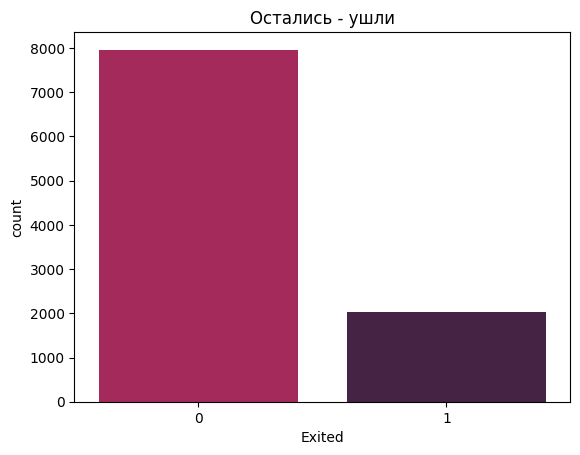

In [18]:
sns.countplot(x='Exited', palette = ['#b71657','#4b1d4a'], data=data)
plt.title('Остались - ушли')
plt.show()

Построим корреляционную матрицу для числовых признаков:

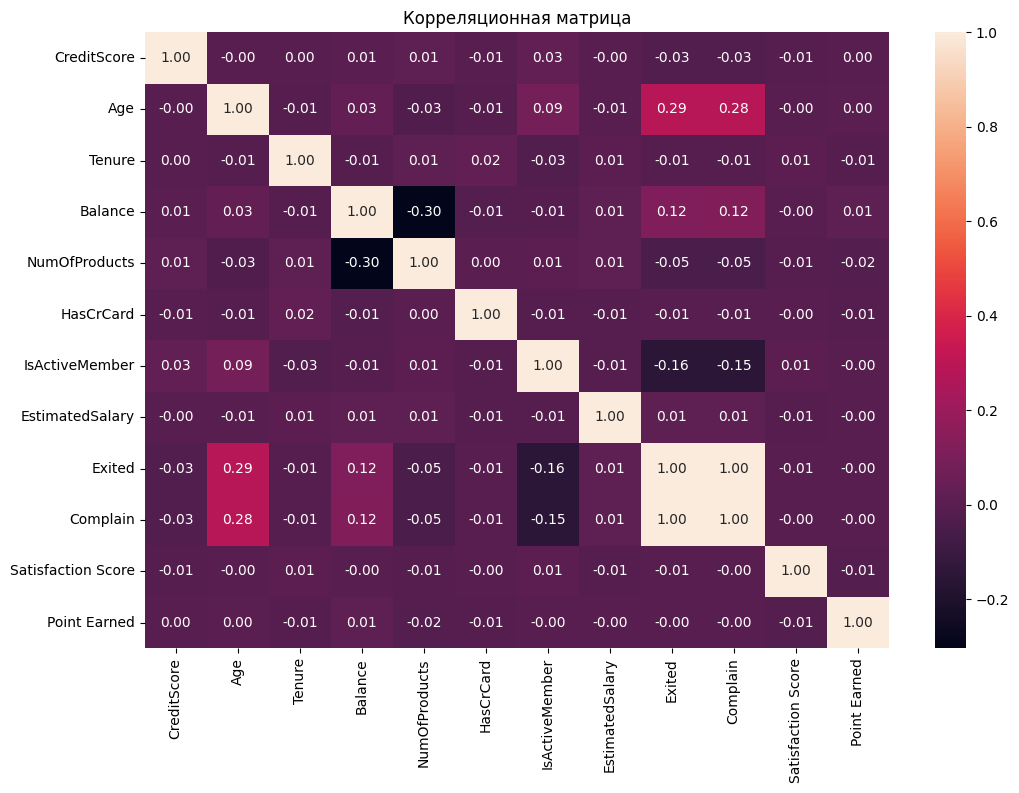

In [19]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

Судя по представленному результату, признак `Complain` имеет корреляцию 1 с целевой переменной `Exited`, что означает, что он полностью предсказывает значение целевого признака. Поэтому, чтобы модель могла лучше выявлять закономерности в данных и оценивать вклад других признаков, его следует удалить.

In [20]:
data = data.drop(['Complain'], axis=1)

Помимо этого видно наличие зависимостей между `Exited` и признаками `Age` и `Balance`

Построим все возможные диаграммы рассеивания для каждой пары переменных:

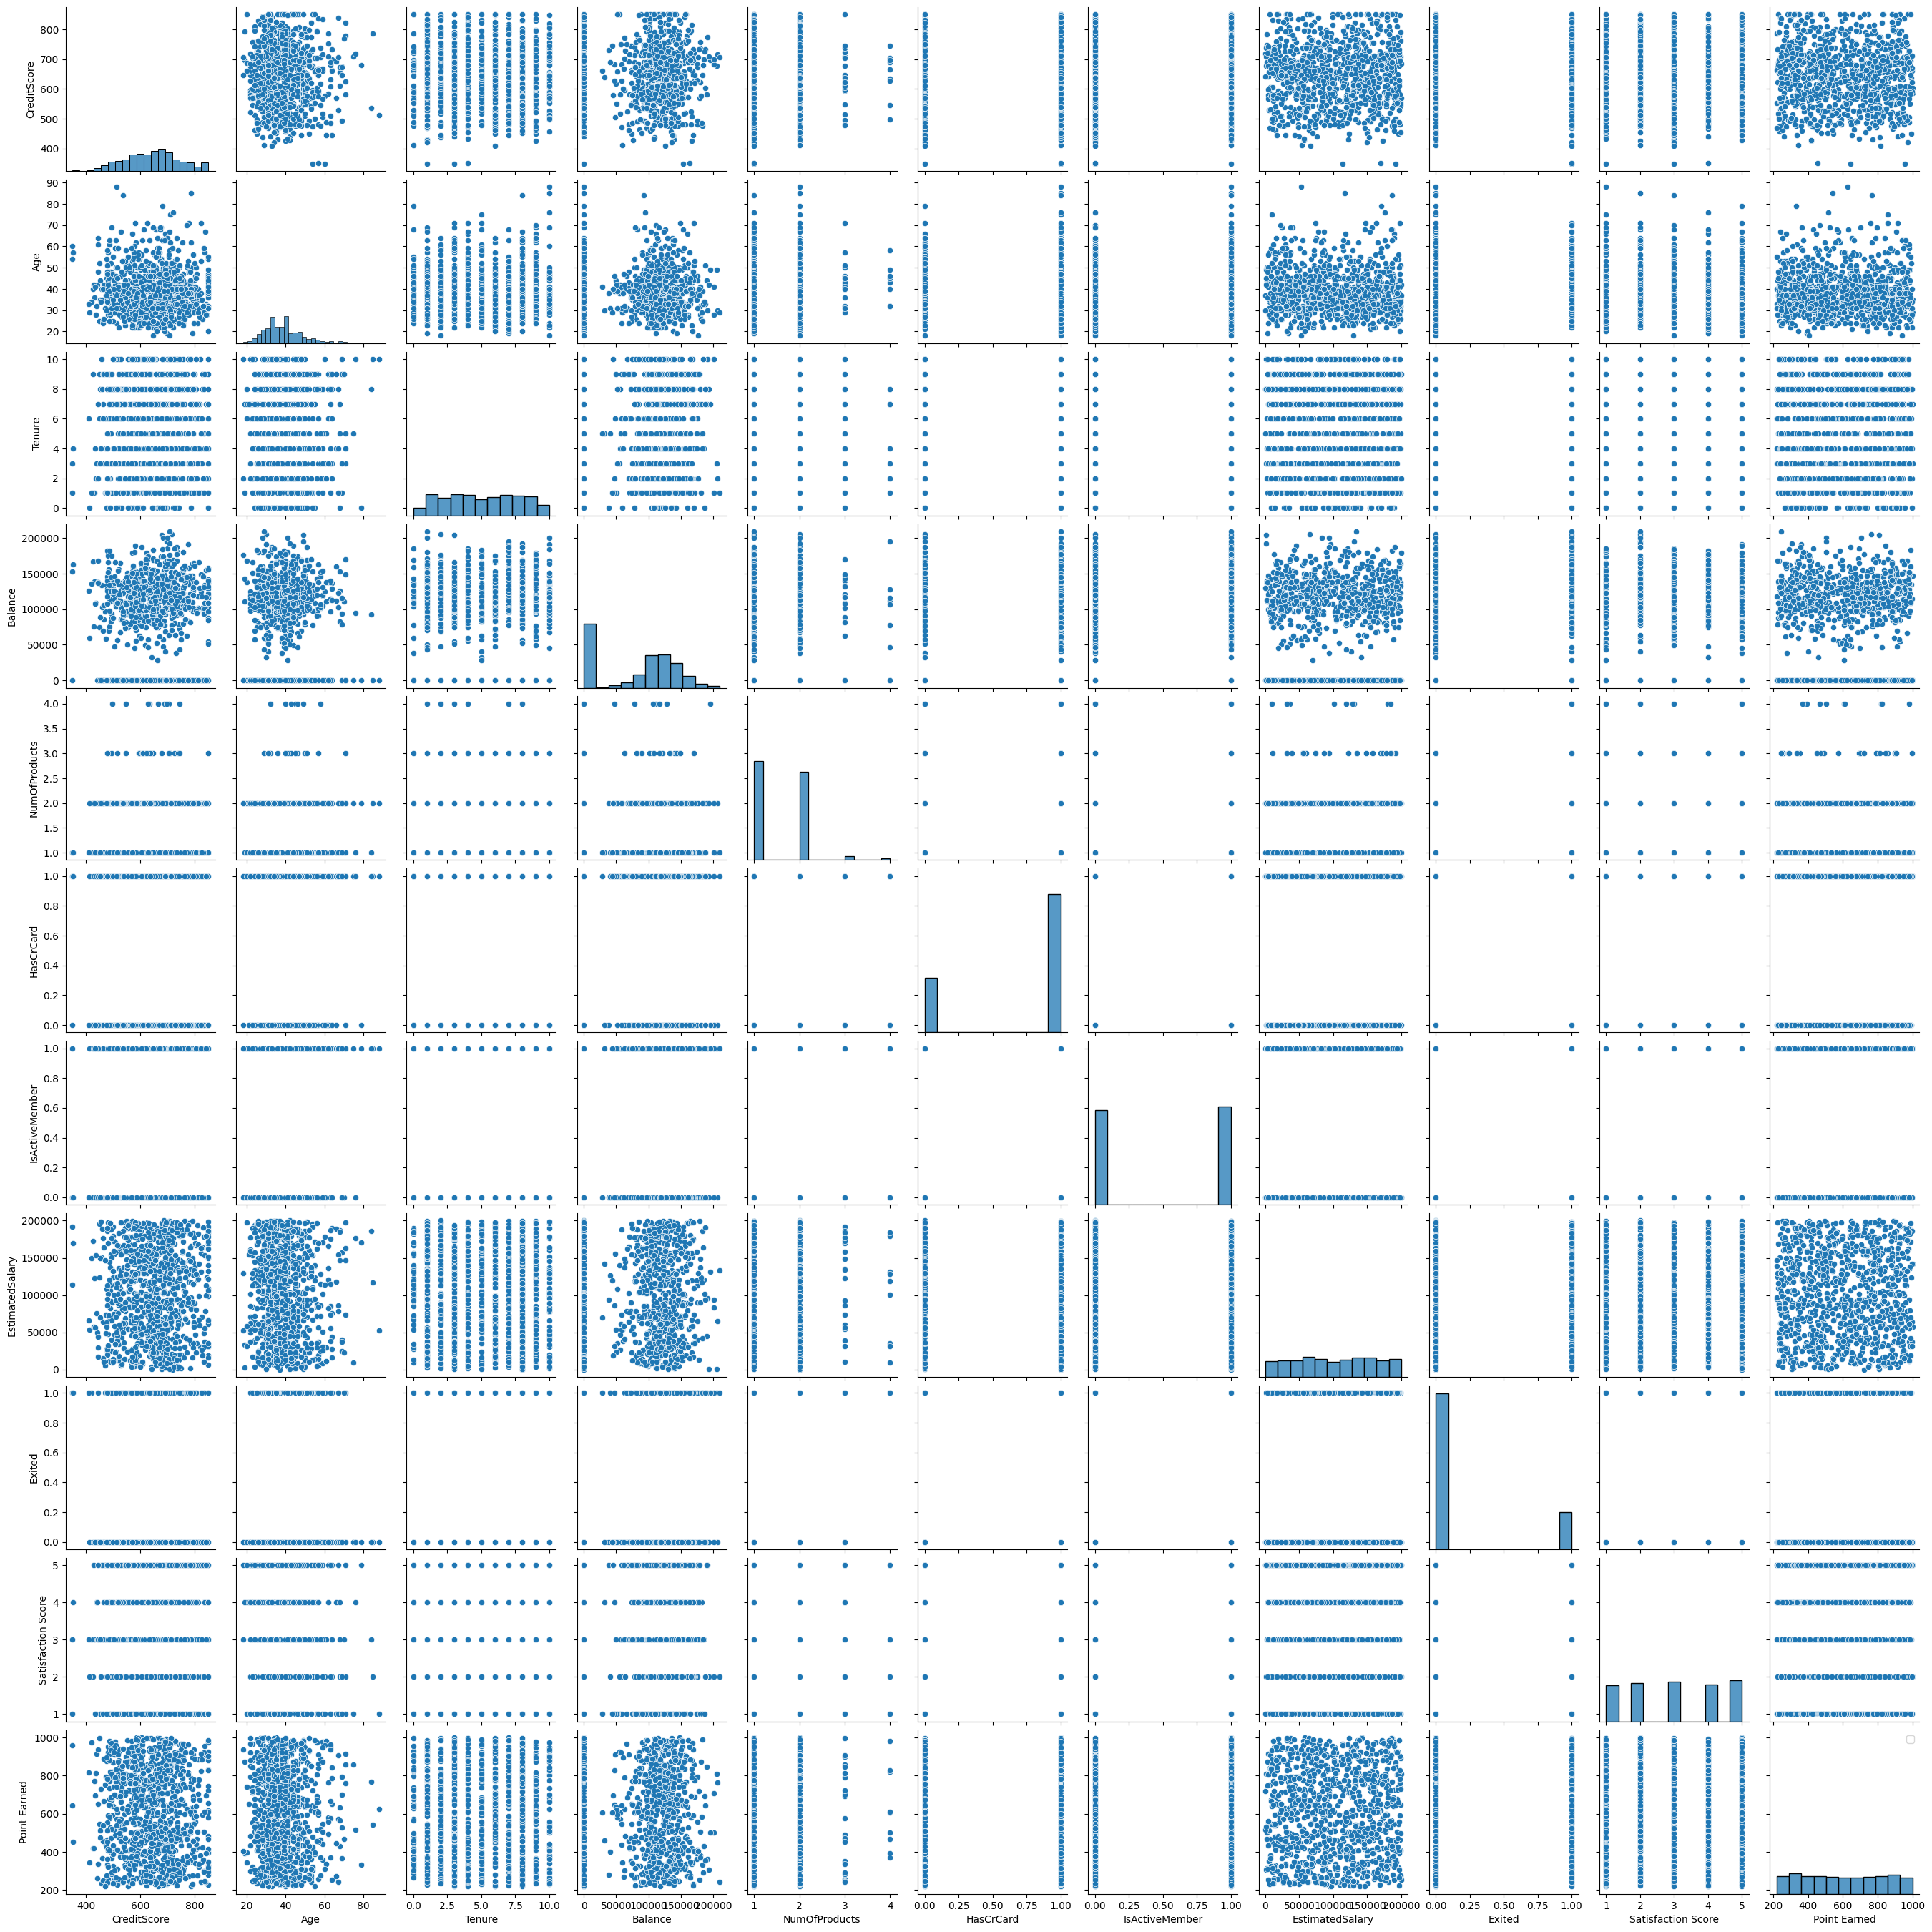

In [21]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], diag_kind='hist')
plt.legend()
pass

И отдельно гистограммы распределения признаков:

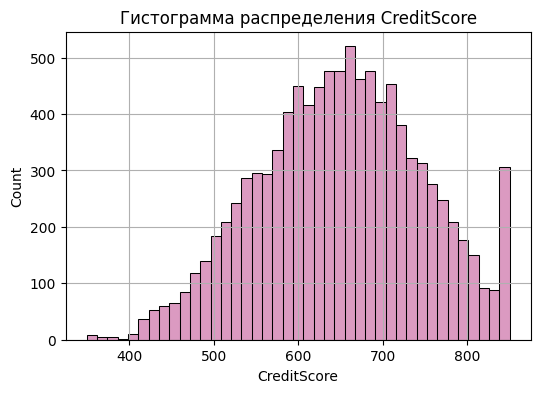

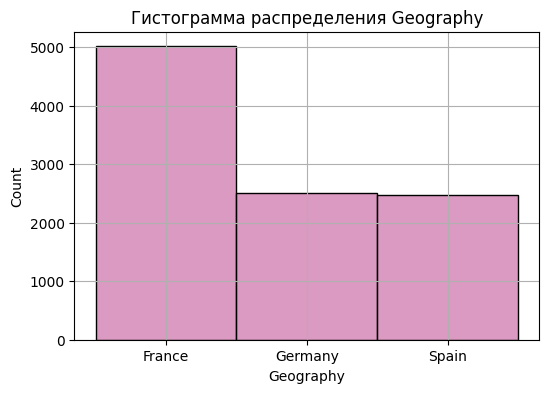

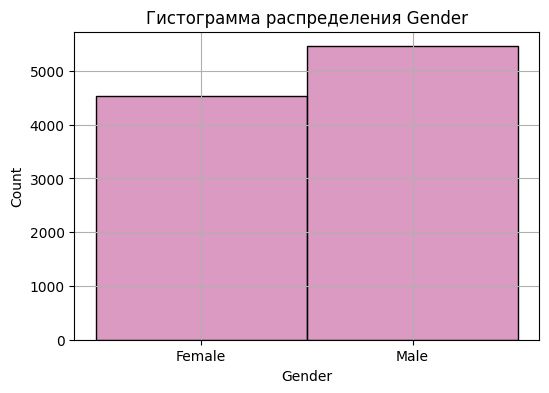

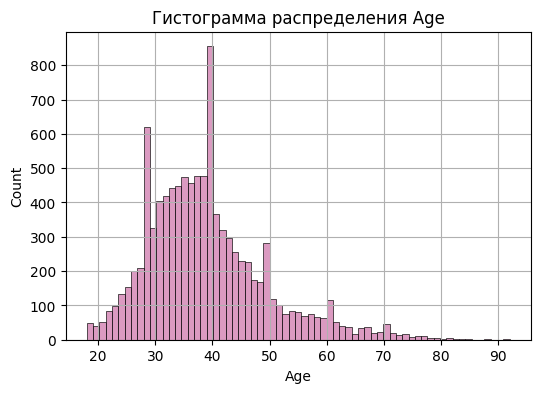

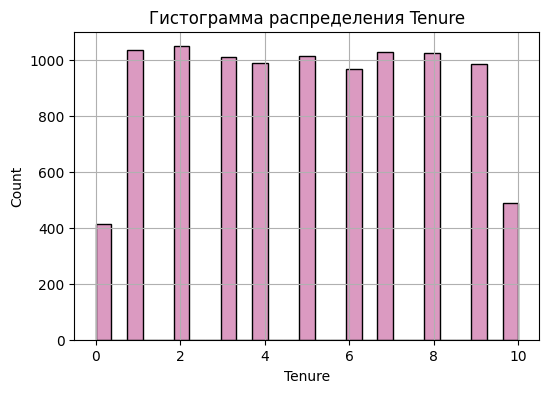

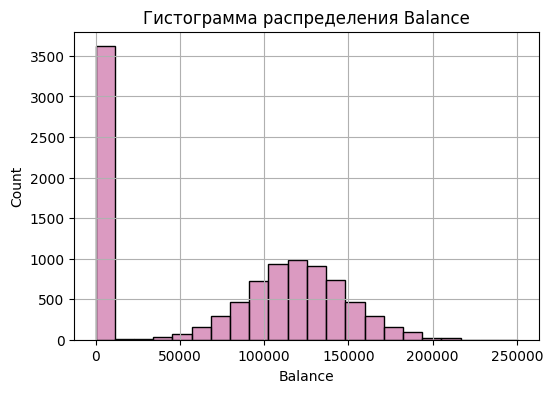

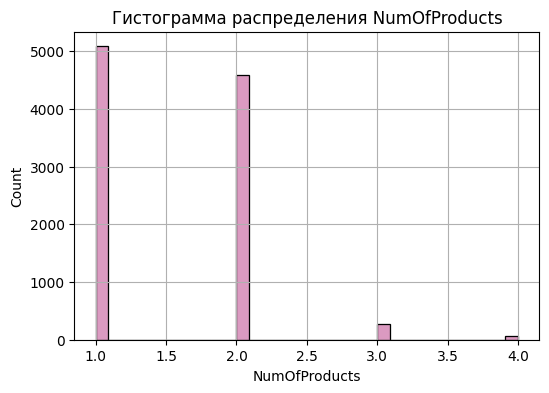

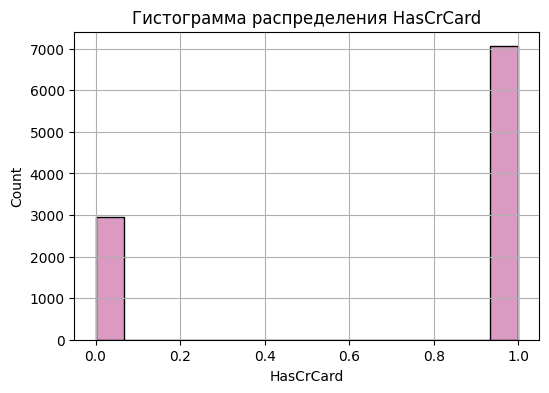

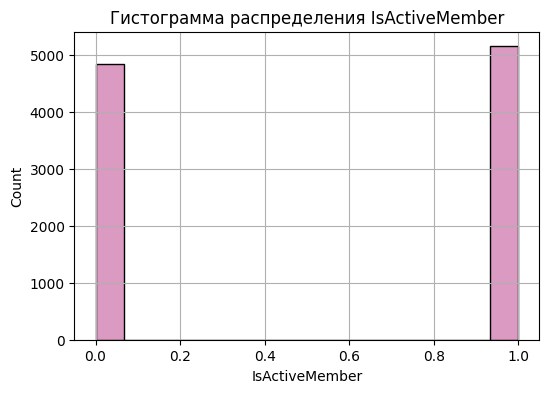

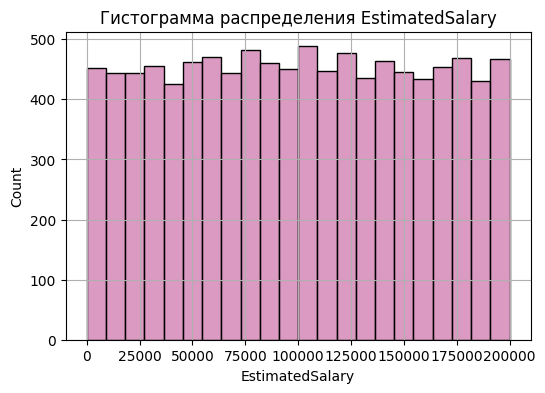

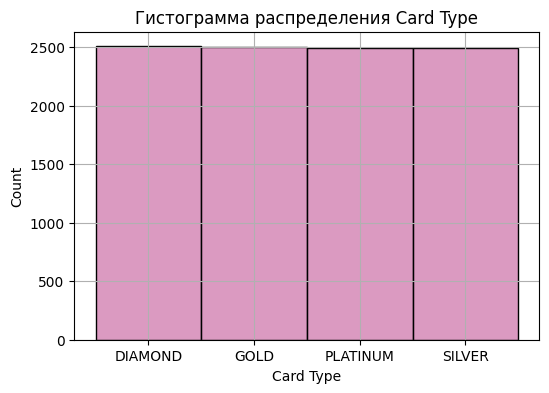

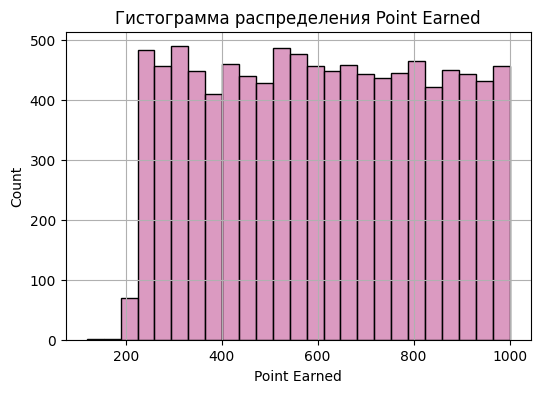

In [22]:
numeric_features = ['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Card Type', 'Point Earned']

for feature in numeric_features:
  plt.figure(figsize=(6, 4))
  plt.title(f'Гистограмма распределения {feature}')
  sns.histplot(data=data, x=feature, color='#cf78ac')
  plt.grid()
  pass

У признаков `CreditScore` и `Age` наблюдаются выбросы. Построим для этих значений ящики с усами

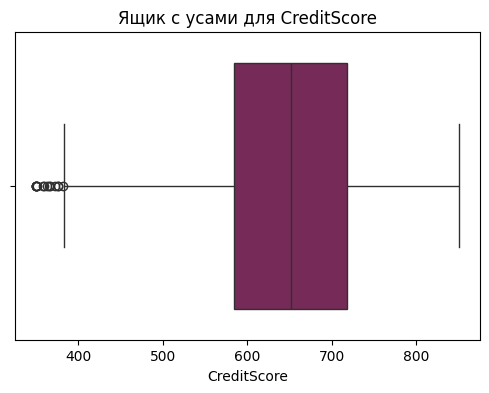

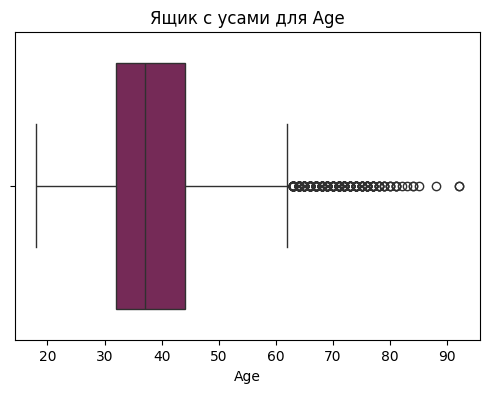

In [23]:
numeric_features = ['CreditScore', 'Age']

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x=feature, color='#811e5a')
    plt.title(f'Ящик с усами для {feature}')
    plt.show()


Вернемся к выбросам позже

Бинаризируем номинальне признаки:

In [24]:
Geography_dummies = pd.get_dummies(data['Geography'])

In [25]:
Geography_dummies.head()

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True


In [26]:
data = pd.concat((data, Geography_dummies), axis=1)
data = data.drop(['Geography'], axis=1)

In [27]:
Gender_dummies = pd.get_dummies(data['Gender'])

In [28]:
Gender_dummies.head()

,Female,Male
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [29]:
data = pd.concat((data, Gender_dummies), axis=1)
data = data.drop(['Gender'], axis=1)

In [30]:
CardType_dummies = pd.get_dummies(data['Card Type'])

In [31]:
CardType_dummies.head()

,DIAMOND,GOLD,PLATINUM,SILVER
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,True,False,False
4,False,True,False,False


In [32]:
data = pd.concat((data, CardType_dummies), axis=1)
data = data.drop(['Card Type'], axis=1)

In [33]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,France,Germany,Spain,Female,Male,DIAMOND,GOLD,PLATINUM,SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,True,False,False,True,False,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,3,456,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,True,False,False,True,False,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,True,False,False,True,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,False,False,True,True,False,False,True,False,False


Теперь перейдем к нормализации количественных признаков:

In [34]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [35]:
data_stand.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,France,Germany,Spain,Female,Male,DIAMOND,GOLD,PLATINUM,SILVER
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-4.838796e-16,2.211564e-16,-1.325162e-16,-9.094947e-17,-5.435652e-17,-1.705303e-17,-2.629008e-17,-2.291500e-17,-1.776357e-17,1.307399e-16,1.680434e-16,1.030287e-17,-4.867218e-17,-9.947598e-18,1.477929e-16,8.668621e-17,2.486900e-17,2.913225e-17,-5.826450e-17,-1.492140e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.109349e+00,-1.994869e+00,-1.733229e+00,-1.225786e+00,-9.115379e-01,-1.547691e+00,-1.030619e+00,-1.740181e+00,-5.059054e-01,-1.432373e+00,-2.157864e+00,-1.002754e+00,-5.787070e-01,-5.737805e-01,-9.123735e-01,-1.095933e+00,-5.783991e-01,-5.776293e-01,-5.765516e-01,-5.767056e-01
25%,-6.883242e-01,-6.599855e-01,-6.959470e-01,-1.225786e+00,-9.115379e-01,-1.547691e+00,-1.030619e+00,-8.535508e-01,-5.059054e-01,-7.210944e-01,-8.698251e-01,-1.002754e+00,-5.787070e-01,-5.737805e-01,-9.123735e-01,-1.095933e+00,-5.783991e-01,-5.776293e-01,-5.765516e-01,-5.767056e-01
50%,1.522142e-02,-1.832414e-01,-4.425736e-03,3.319473e-01,-9.115379e-01,6.460594e-01,9.701940e-01,1.802717e-03,-5.059054e-01,-9.815646e-03,-6.706213e-03,9.971540e-01,-5.787070e-01,-5.737805e-01,-9.123735e-01,9.123735e-01,-5.783991e-01,-5.776293e-01,-5.765516e-01,-5.767056e-01
75%,6.980745e-01,4.842004e-01,6.870955e-01,8.198795e-01,8.076962e-01,6.460594e-01,9.701940e-01,8.572002e-01,-5.059054e-01,7.014631e-01,8.608389e-01,9.971540e-01,1.727817e+00,-5.737805e-01,1.095933e+00,9.123735e-01,1.728737e+00,1.731041e+00,-5.765516e-01,-5.767056e-01
max,2.063781e+00,5.060944e+00,1.724377e+00,2.795184e+00,4.246164e+00,6.460594e-01,9.701940e-01,1.737113e+00,1.976457e+00,1.412742e+00,1.741663e+00,9.971540e-01,1.727817e+00,1.742653e+00,1.095933e+00,9.123735e-01,1.728737e+00,1.731041e+00,1.734277e+00,1.733814e+00


In [36]:
data = data_stand

## Построение модели

Класс Exited не сбалансирован (много оставшихся в банке клиентов и мало ушедших). Поэтому необходимо выполнить балансировку.

In [37]:
X = data.drop(columns=['Exited'])  # Наши признаки
y = data['Exited']  # Целевая переменная
y = y.astype(int)

In [38]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

Разбиваем данные на обучающую и тестовую выборку:

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(11146, 4778)

Начнем с KNeighborsClassifier. Он хорошо подходит для задач с бинарной классификацией, хотя может быть чувствителен к количеству соседей и масштабированию данных

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [42]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
print(err_test)

0.25554625366262035


Подбор параметров:

In [43]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Оптимальное k
optimal_k = k_values[np.argmax(cv_scores)]
print("Оптимальное количество соседей:", optimal_k)

Оптимальное количество соседей: 1


In [46]:
from sklearn.metrics import classification_report

# Обучение модели с оптимальным k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

print("Accuracy на обучающей выборке:", knn.score(X_train, y_train))
print("Ошибка на обучающей выборке:", 1 - knn.score(X_train, y_train))
print("Accuracy на тестовой выборке:", knn.score(X_test, y_test))
print("Ошибка на тестовой выборке:", 1 - knn.score(X_test, y_test))

Accuracy на обучающей выборке: 1.0
Ошибка на обучающей выборке: 0.0
Accuracy на тестовой выборке: 0.8917957304311427
Ошибка на тестовой выборке: 0.10820426956885731


Точность 1.0 на обучающей выборке может говорить о возможном переобучении модели, но точность на тестовой выборке тоже достаточно высокая. Так что можно сказать о вероятно корректной работе модели

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8917957304311427

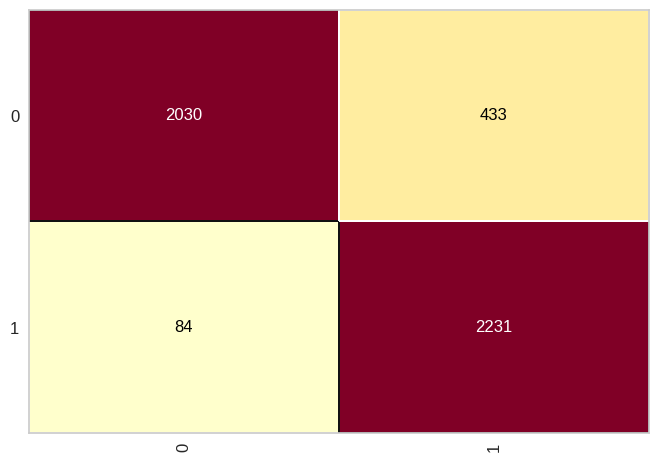

In [48]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

kNN показала хорошую точность, особенно для ухода клиентов (FN всего 84), но присутствует больше ошибок FP (433). Это значит, что модель чаще ошибается, классифицируя оставшихся клиентов как ушедших, чем наоборот. Для задач, где важно избегать ложных срабатываний, это может быть проблемой.

Теперь попробуем использовать модель RandomForest:

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(rf, param_distributions=param_grid_rf, cv=5, scoring='accuracy', n_iter=10, random_state=0)
random_search.fit(X_train, y_train)

print("Лучшие параметры для Random Search:", random_search.best_params_)

Лучшие параметры для Random Search: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}


In [51]:
from sklearn.ensemble import RandomForestClassifier

# Создаем и обучаем классификатор
rf = RandomForestClassifier(random_state=0, **random_search.best_params_)
rf.fit(X_train, y_train)

print("Accuracy на обучающей выборке для RF:", rf.score(X_train, y_train))
print("Ошибка на обучающей выборке:", 1 - rf.score(X_train, y_train))
print("Accuracy на тестовой выборке для RF:", rf.score(X_test, y_test))
print("Ошибка на тестовой выборке:", 1 - rf.score(X_test, y_test))

Accuracy на обучающей выборке для RF: 1.0
Ошибка на обучающей выборке: 0.0
Accuracy на тестовой выборке для RF: 0.9428631226454584
Ошибка на тестовой выборке: 0.05713687735454165


Точность на обучающе выборке по-прежнему 1.0, но точность на тестовой выборке больше, чем у knn. Можно сделать вывод, что RandomForestClassifier хорошо подходит для данной задачи

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9428631226454584

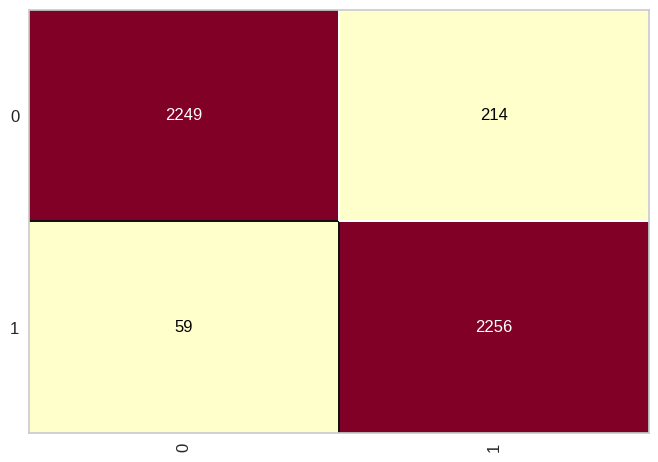

In [52]:
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Эта модель показывает хороший баланс между FP и FN, что говорит о хорошей способности модели предсказывать оба класса

Модель логистической регресии:

In [53]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train, y_train)

print("Точность на обучающей выборке для логистической регрессии:", log_reg.score(X_train, y_train))
print("Ошибка на обучающей выборке для логистической регрессии:", 1 - log_reg.score(X_train, y_train))
print("Точность на тестовой выборке для логистической регрессии:", log_reg.score(X_test, y_test))
print("Ошибка на тестовой выборке для логистической регрессии:", 1 - log_reg.score(X_test, y_test))

Точность на обучающей выборке для логистической регрессии: 0.706800645971649
Ошибка на обучающей выборке для логистической регрессии: 0.29319935402835096
Точность на тестовой выборке для логистической регрессии: 0.6990372540812055
Ошибка на тестовой выборке для логистической регрессии: 0.30096274591879446


Показывает наихудшие результаты на обоих выборках. Это может быть связано с тем, что линейная природа логистической регрессии ограничивает её способность моделировать сложные зависимости между признаками

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6990372540812055

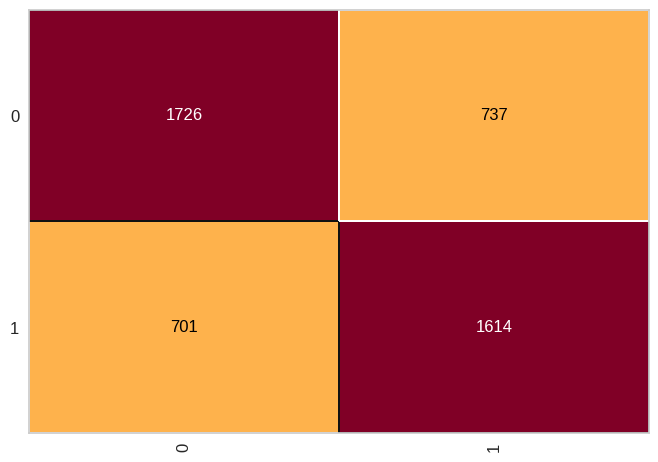

In [54]:
cm = ConfusionMatrix(log_reg)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Логистическая регрессия имеет самый высокий уровень ошибок, как FP, так и FN, что отражается на её сравнительно низкой точности. Это может быть недостатком для анализа оттока, так как именно уходящие клиенты важны для банка с точки зрения удержания.

И модель градиентного бустинга:

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0)

gbc.fit(X_train, y_train)

print("Точность на обучающей выборке для Gradient Boosting:", gbc.score(X_train, y_train))
print("Ошибка на обучающей выборке для Gradient Boosting:", 1 - gbc.score(X_train, y_train))
print("Точность на тестовой выборке для Gradient Boosting:", gbc.score(X_test, y_test))
print("Ошибка на тестовой выборке для Gradient Boosting:", 1 - gbc.score(X_test, y_test))

Точность на обучающей выборке для Gradient Boosting: 0.8129373766373587
Ошибка на обучающей выборке для Gradient Boosting: 0.18706262336264134
Точность на тестовой выборке для Gradient Boosting: 0.7875680200920887
Ошибка на тестовой выборке для Gradient Boosting: 0.2124319799079113


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.7875680200920887

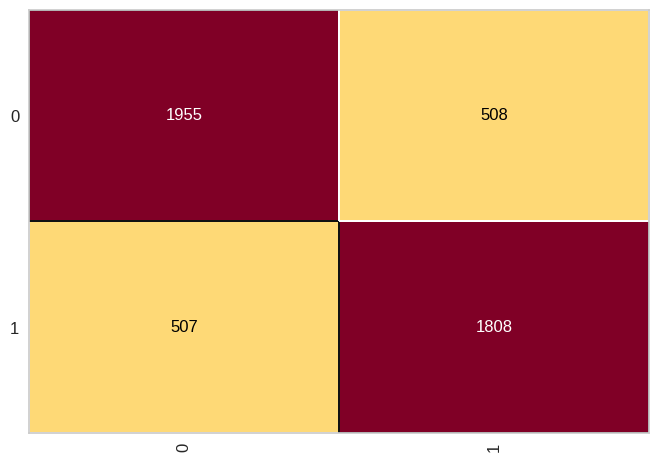

In [56]:
cm = ConfusionMatrix(gbc)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Результаты лучше логистической регрессии, но всё же хуже, чем у первых двух моделей. Имеет сравнительно большое количество ошибок FP и FN, но распределение ошибок более сбалансировано, чем у логистической регрессии. Это значит, что GBC лучше предсказывает оба класса, хотя и не так хорошо, как RF и kNN

Теперь попробуем удалить выбросы в `Age` и `CredirScore`, заменив их медианными значениями:

In [57]:
from sklearn.preprocessing import RobustScaler

numeric_columns = ['Age', 'CreditScore']

for col in numeric_columns:
    lower_percentile = np.percentile(data[col], 1)
    upper_percentile = np.percentile(data[col], 99)

    median_value = data[col].median()

    data[col] = np.where((data[col] < lower_percentile) | (data[col] > upper_percentile),
                         median_value, data[col])

И попробуем сравнить результаты после удаления выбросов:

In [58]:
X = data.drop(columns=['Exited'])
y = data['Exited']
y = y.astype(int)

In [59]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(11146, 4778)

In [64]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

print("Accuracy на обучающей выборке:", knn.score(X_train, y_train))
print("Accuracy на тестовой выборке:", knn.score(X_test, y_test))

Accuracy на обучающей выборке: 1.0
Accuracy на тестовой выборке: 0.8911678526580159


In [65]:
rf = RandomForestClassifier(random_state=0, **random_search.best_params_)
rf.fit(X_train, y_train)

print("Accuracy на обучающей выборке для RF:", rf.score(X_train, y_train))
print("Accuracy на тестовой выборке для RF:", rf.score(X_test, y_test))

Accuracy на обучающей выборке для RF: 1.0
Accuracy на тестовой выборке для RF: 0.9428631226454584


Предыдущие результаты
* для knn: 0.8917957304311427
* для randomforest: 0.9428631226454584

Как видно, в методе ближайших значений разница незначительная, а для RF ее вообще нет. Поэтому можно сказать, что для в данной задаче для текущих данных и моделях выбросы не влияют на результат обучения


## Общие выводы

Была решена задача бинарной классификации для оттока клиентов банка

В результате анализа данных были удалены значени 'RowNumber', 'CustomerId', 'Surname', которые являлись уникальными и не влияют на результат, а также обнаружена идеальная корреляция между целевой переменной `Exited` и признаком наличия жалоб `Complain`. Он тоже был удален для того, чтобы модель могла оценивать вклады остальных признаков.

При подготовке были произведены нормировка данных и балансировка классов

Были использованы 4 модели: k-ближайших средних (KNN), случайный лес (RandomForestClassifier), логической регрессии (LogisticRegression) и градиентного бустинга (GBC). Получены следующие результаты на тестовой выборке:
* k-Nearest Neighbors - точность: ~89%
* RandomForestClassifier - точность: ~94%
* LogisticRegression - точность: ~70%
* GBC - точность: ~79%

Таким образом, лучшей моделью оказался Random Forest, так как он показал наиболее высокую точность на тестовой выборке и уверенно справился с определением классов
